# Basic PyTorch Neural Network
---
## What will we work with ? 
---
Time to put the pieces together. In this sections we'll :
- Creat a multi-layer deep learning model
- Load data
- Train and Validate the model

## Perform Standard Imports
---

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Creating A Model Class 
---
## Activation : Relu 
---

| Input Layer | Layer 1 | Layer 2 | Output Layer | TEST_RMSE |
| ----------- | ------- | ------- | ------------ | --------- |
| 10 | 40 | 2 | 1 | 38.78213882 |
| 10 | 20 | 2 | 1 | 45.46975708 |
| 10 | 50 | 2 | 1 | 82.05916595 |
| 10 | 50 | 10 | 1 | 38.47027206 |
| 10 | 40 | 10 | 1 | 62.05023575 |
| 10 | 30 | 4 | 1 | 38.77592087 |
| 10 | 25 | 5 | 1 | 49.85105896 |
| 10 | 100 | 50 | 1 | 65.09445953 |
| 10 | 20 | 10 | 1 | 41.89645004 |
| 10 | 25 | 15 | 1 | 41.88322067 |


In [2]:
l1 = input("Number of Layers in L 1 : ")
l2 = input("Number of Layers in L 2 : ")
n_iter = input("Number of Epochs : ")

l1 = int(l1)
l2 = int(l2)
n_iter = int(n_iter)

Number of Layers in L 1 : 100
Number of Layers in L 2 : 20
Number of Epochs : 50


In [3]:
class Model(nn.Module):
    def __init__(self, in_features=10, l1=l1, l2=l2, out_features=1):
        
        super().__init__()
        # input layer
        self.fc1 = nn.Linear(in_features, l1)
        # hiddne layer
        self.fc2 = nn.Linear(l1, l2)
        #output layer
        self.out = nn.Linear(l2, out_features)
        
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.out(x)
        
        
        return x

## Instantiate the Model class using parameter defaults
---

In [4]:
torch.manual_seed(44)
model = Model()

## Load Dataset

In [5]:
train_d = pd.read_csv('../data_data/train_dead.csv')
test_d = pd.read_csv('../data_data/test_dead.csv')

In [6]:
X_train = train_d.iloc[:,0:10]
y_train = train_d.iloc[:,10:11]

X_test = test_d.iloc[:,0:10]
y_test = test_d.iloc[:,0:10:11]

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [7]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

## Prepare DataLoader
---
For this analysis we don't need to create a Dataset object. <br>
But we should take advantage of PyTorch's DataLoader tool. <br>
Even though our dataset is small, we'll load it into our model in two batches. <br>
This technique becomes very helpful with large datasets.

In [8]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [9]:
# For Redo
torch.manual_seed(44)
model = Model()

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [11]:
epochs = n_iter
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():1.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3161800.75000000
epoch: 11  loss: 292045.06250000
epoch: 21  loss: 29535.88867188
epoch: 31  loss: 72976.86718750
epoch: 41  loss: 27921.74023438


Text(0.5, 0, 'epoch')

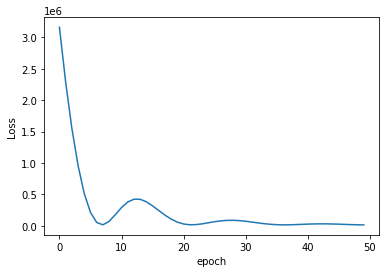

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [13]:
# TO EVALUATE THE ENTIRE TRAINING SET
with torch.no_grad():
    y_val = model(X_train)
    loss = torch.sqrt(criterion(y_val, y_train))
print(f'RMSE: {loss:.8f}')

RMSE: 119.33889771


## Validate the model
---
Here, we want to run the entire test set through the model, and compare it to the known value.
For this step, we don't want to update weights and biases, so we set torch.no_grad()

In [14]:
#### TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 61.68543243
